# Sales Analysis

#### Import necessary libraries

In [1]:
# https://www.youtube.com/watch?v=eMOA1pPVUc4
# Part 1
import os
import pandas as pd

#### Merge data from each month into one CSV

In [2]:
#Part 2
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] 

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)
    

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of Null

In [4]:
#
#(Skip these until #Part 3 : Augment data with additional columns : month)

#Part 4  Null value
nan_df = all_data[all_data.isna().any(axis=1)]  
nan_df.head()

#Delete Null Value
all_data = all_data.dropna() #how='any' only drop one row, 'all' drop all row
all_data.head()

#Back to Part 3 : add Month Column -> all_data['Month'] = all_data['Month'].astype('int32')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
#Part 5 : Exclude the first 2 chars = "Or" instead month number  
#Error because of first 2 chars = "Or" instead month number because of they are titles, exclude with !=
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [6]:
#Part 6 : Make numeric format
# Error because the type of columns are not numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])  # make float

all_data['Visa Sponsored'] = 'Visa' 


### Augment data with additional columns

#### Add month column

In [7]:
#Part 3a Clean the Null & Or 
#Part 3b
all_data['Month'] = all_data['Order Date'].str[0:2]  
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Visa Sponsored,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Visa,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Visa,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Visa,4


#### Add month column (alternative method)

In [8]:
#all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
#all_data.drop('Month 2',axis=1,inplace=True)            
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Visa Sponsored,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Visa,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Visa,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Visa,4



#### Add city column

In [9]:
#Part 7
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Visa Sponsored,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Visa,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Visa,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA)


## Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month? 

In [10]:
#Part 8
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [11]:
#Part 9
all_data.groupby(['Month']).sum() #grouping to each months and sum 
all_data.groupby(['Month']).sum()['Sales'] #only display Sales column

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

range(1, 13)


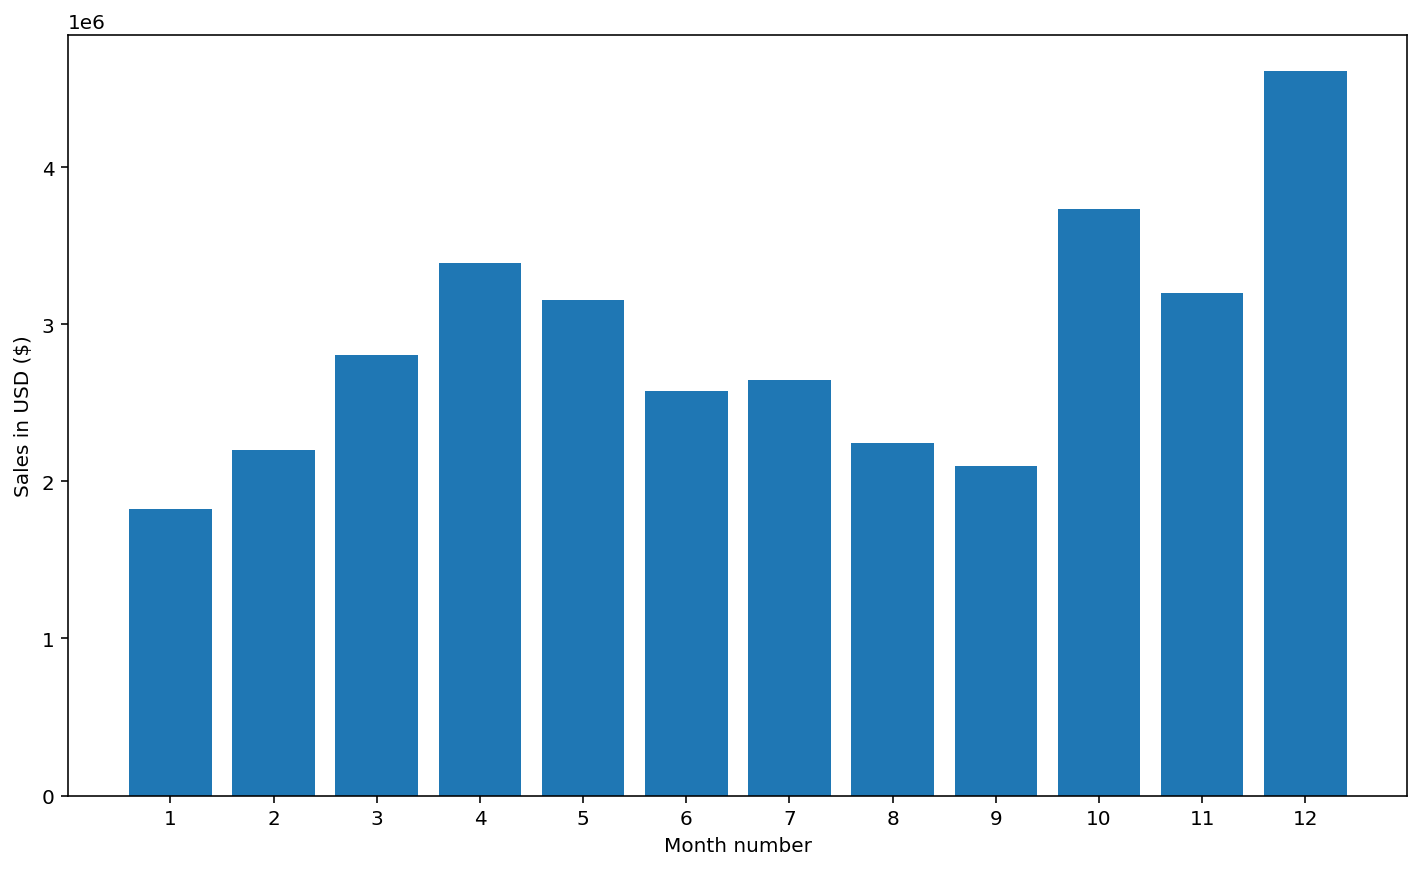

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)') #display sales column graph to month
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?

In [13]:
all_data.groupby(['City']).sum()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Visa Sponsored,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Visa,4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Visa,4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99


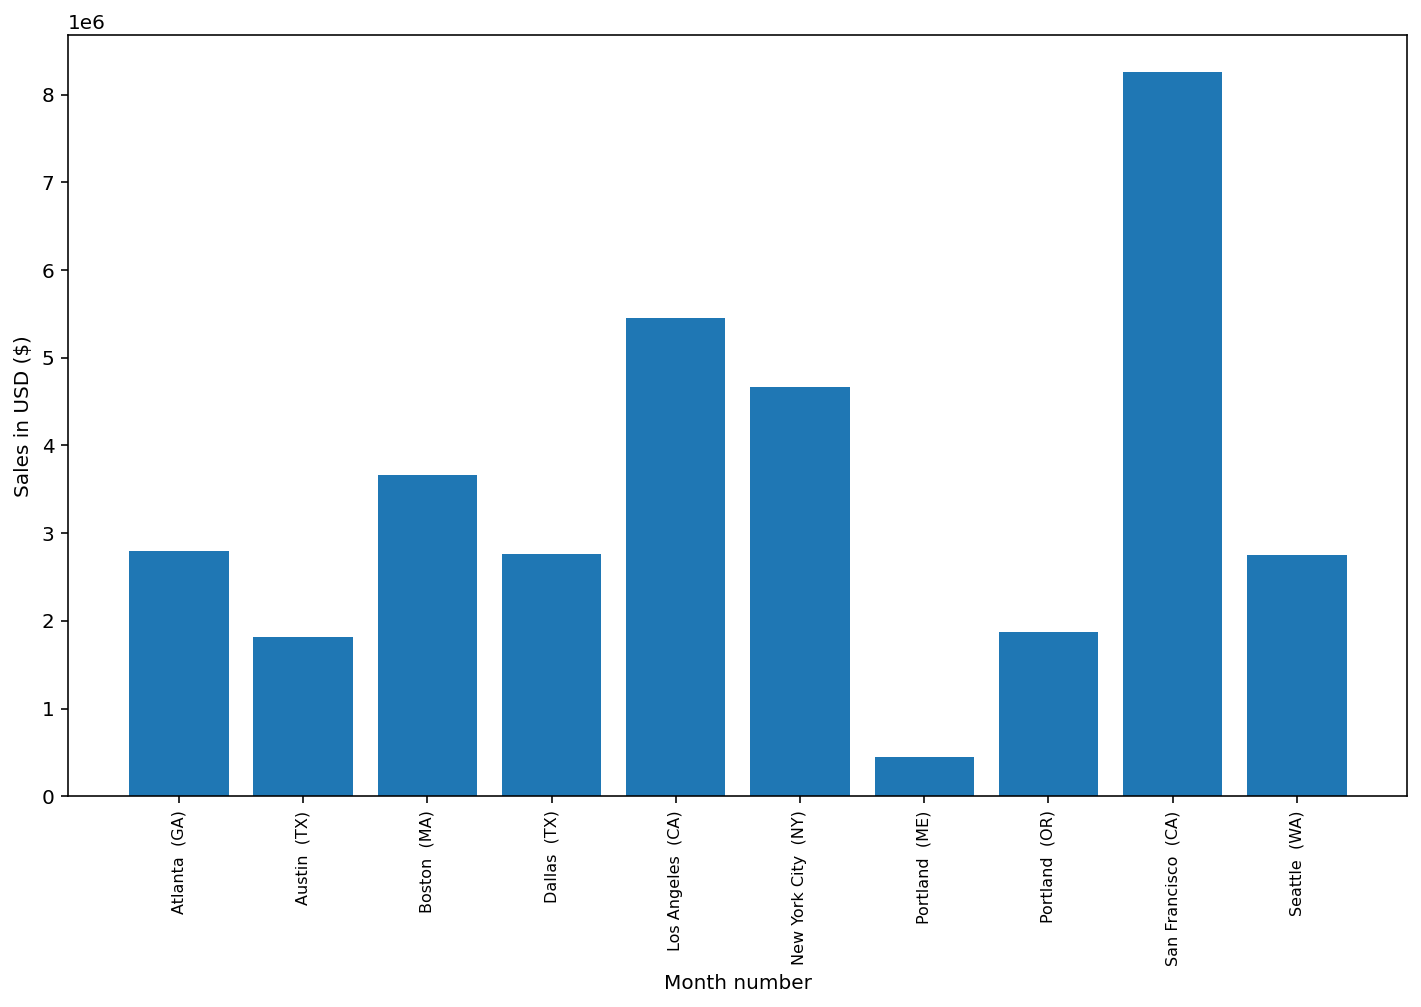

In [14]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]  #display the correct order with sales

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])  #display the correct order with sales
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour #display hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute #display minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Visa Sponsored,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Visa,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Visa,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99,9,27,1


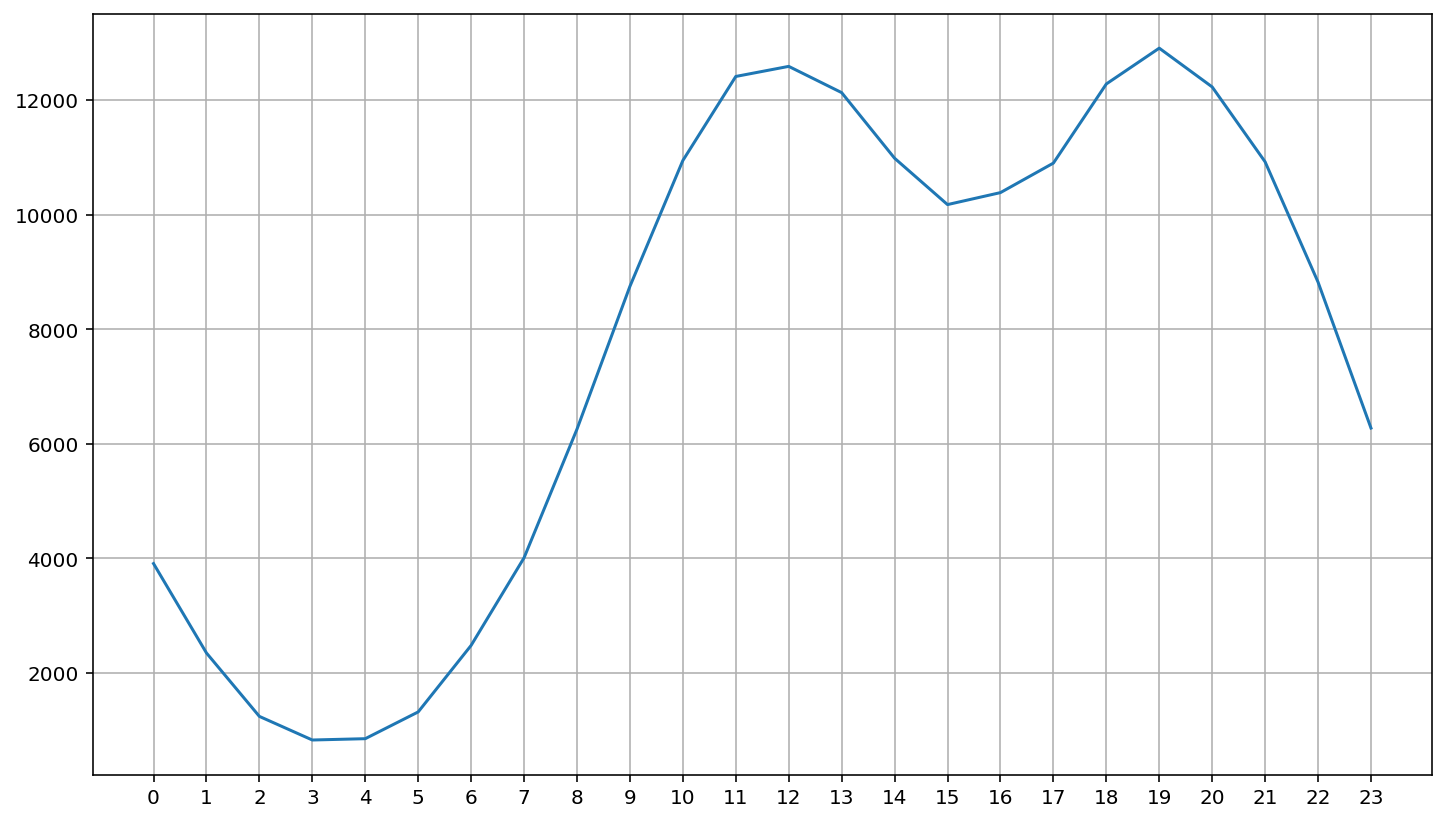

In [16]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [17]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

#if same order_id means the products bought together sent to same address
#Group duplicate order id
#shift+tab detail cmd
# Below show all duplicates
df = all_data[all_data['Order ID'].duplicated(keep=False)] #keep =False display all duplicates, 'first' -> display only first duplicate, 'last' display only last
#df.head(20)

#or
#Below remove duplicates
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x)) #products with the same Order ID grouped into one category

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-17-0cb99786e3b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x)) #products with the same Order ID grouped into one category


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [18]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)
    
    
#or

# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

#count pairs that occured together
#from itertools import combinations
#from collections import Counter

#count = Counter()

#for row in df2['Grouped']: #row at dataframe Grouped column each one of row#
#    row_list = row.split(',') #make sublist separated by comma
#    count.update(Counter(combinations(row_list, 2))) #how many product occurences (2) at one order id

#count.most_common(10)    
    
#for key,value in count.most_common(10):
#    print(key, value)



('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### What product sold the most? Why do you think it sold the most?

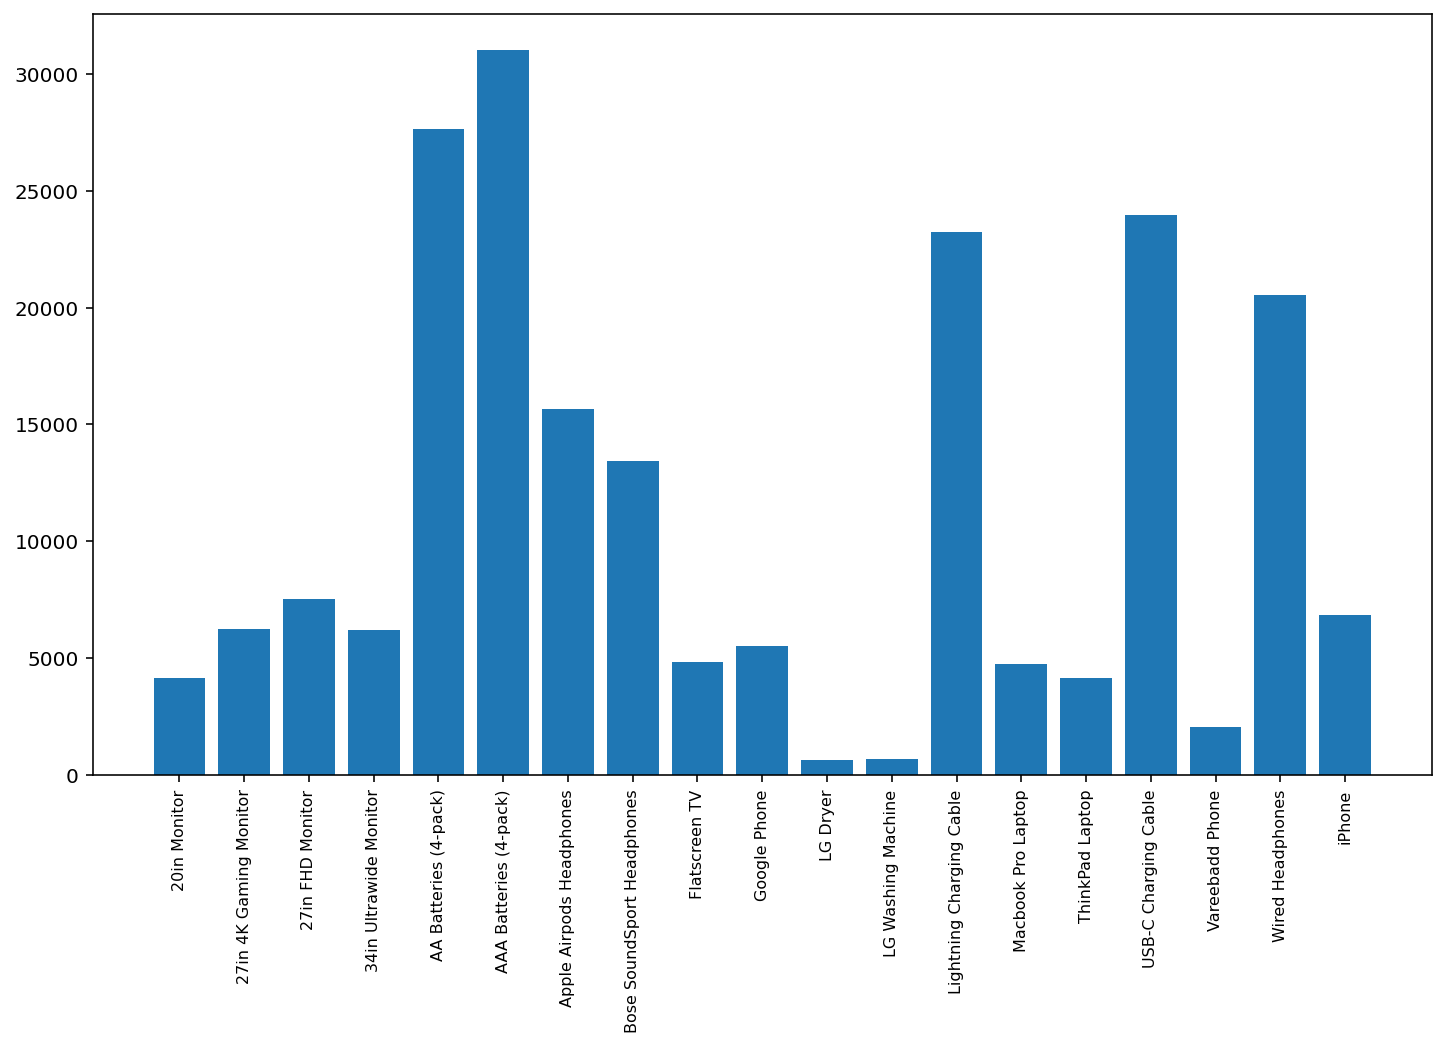

In [19]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-20-453e22375345>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-20-453e22375345>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


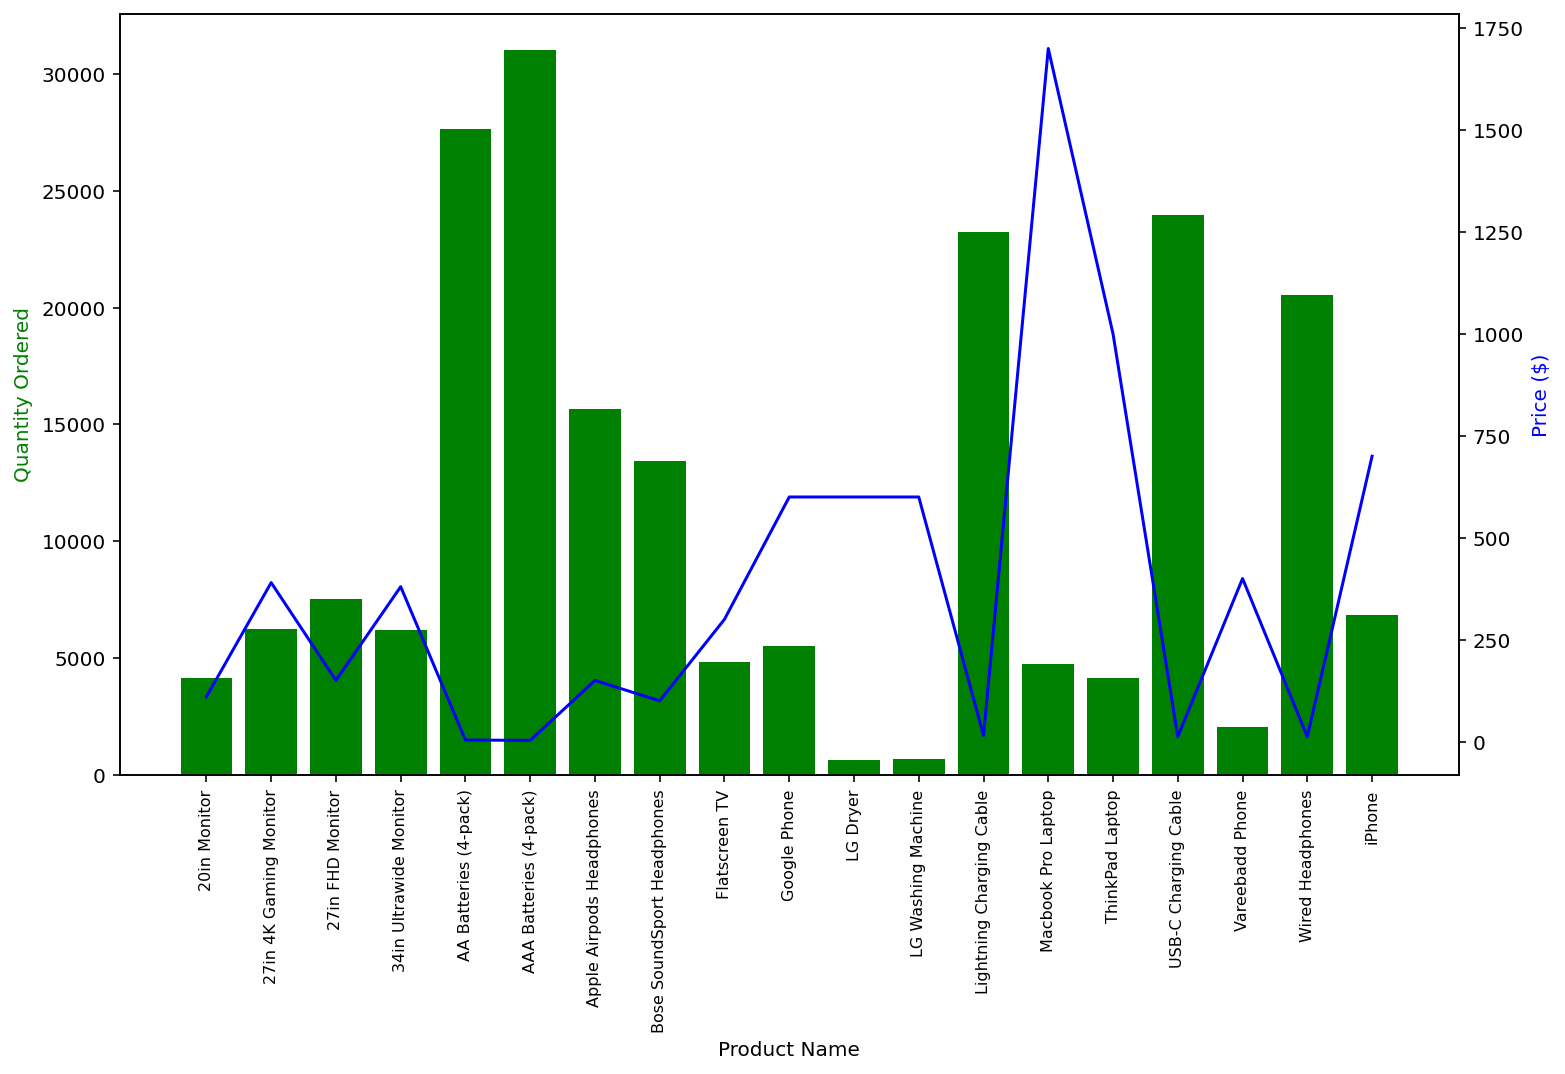

In [20]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [21]:
all_data['Product']

0               USB-C Charging Cable
2         Bose SoundSport Headphones
3                       Google Phone
4                   Wired Headphones
5                   Wired Headphones
                     ...            
186845      Lightning Charging Cable
186846              27in FHD Monitor
186847        AAA Batteries (4-pack)
186848                        iPhone
186849      Lightning Charging Cable
Name: Product, Length: 185950, dtype: object

In [22]:


#### Read Headers
all_data.columns

## Read each Column display row 0-8
all_data[['Product', 'Sales', 'Price Each']][0:8]

#all_data.Product

all_data.iloc[0:4] #display row 0-4
## Read Each Row
#print(all_data.iloc[0:4])

all_data.iloc[2,1] #google idx y=2,x=1 (started from 0)

#display each row horizontal type detail
#for index, row in all_data.iterrows():
#    print(index,row['Product']) #print(index,row) -> display all type and detail
    
all_data.loc[all_data['Product']=="Google Phone"]
#for index, row in all_data.iterrows(): 
#    print(index, row['Product'])
#all_data.loc[all_data['Product'] == "Wired Headphones"]

## Read a specific location (R,C)
#print(all_data.iloc[2,1])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Visa Sponsored,Month,City,Sales,Hour,Minute,Count
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),600.0,14,38,1
11,176567,Google Phone,1,600.0,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),600.0,17,18,1
18,176574,Google Phone,1,600.0,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),600.0,19,42,1
33,176586,Google Phone,1,600.0,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",Visa,4,San Francisco (CA),600.0,17,0,1
37,176590,Google Phone,1,600.0,04/11/19 11:46,"873 6th St, New York City, NY 10001",Visa,4,New York City (NY),600.0,11,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186573,176290,Google Phone,1,600.0,03/30/19 11:06,"860 Johnson St, New York City, NY 10001",Visa,3,New York City (NY),600.0,11,6,1
186575,176291,Google Phone,1,600.0,03/10/19 15:15,"289 Forest St, Atlanta, GA 30301",Visa,3,Atlanta (GA),600.0,15,15,1
186659,176373,Google Phone,1,600.0,03/05/19 07:08,"650 Johnson St, Dallas, TX 75001",Visa,3,Dallas (TX),600.0,7,8,1
186713,176427,Google Phone,1,600.0,03/06/19 08:41,"425 Cherry St, Austin, TX 73301",Visa,3,Austin (TX),600.0,8,41,1


In [23]:
all_data.describe()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.0
mean,1.124383,184.399735,7.059140,185.490917,14.413305,29.481361,1.0
std,0.442793,332.731330,3.502996,332.919771,5.423416,17.317573,0.0
min,1.000000,2.990000,1.000000,2.990000,0.000000,0.000000,1.0
25%,1.000000,11.950000,4.000000,11.950000,11.000000,14.000000,1.0
50%,1.000000,14.950000,7.000000,14.950000,15.000000,29.000000,1.0
75%,1.000000,150.000000,10.000000,150.000000,19.000000,45.000000,1.0
max,9.000000,1700.000000,12.000000,3400.000000,23.000000,59.000000,1.0


In [24]:
all_data.sort_values('Product') #sort based on Product column

all_data.sort_values(['Product','Quantity Ordered'], ascending=[1,0]) #sort product : asc, Qty :descending

all_data['Total Sales Price'] = all_data['Quantity Ordered'] * all_data['Price Each'] #same with Sales Value

all_data = all_data.drop(columns=['Total Sales Price'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Visa Sponsored,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Visa,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Visa,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99,9,27,1


In [25]:
all_data['Total'] = all_data.iloc[:,10:13].sum(axis=1) #sum of column 10-12 (started from 0) horizontally axis=1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Visa Sponsored,Month,City,Sales,Hour,Minute,Count,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Visa,4,Dallas (TX),23.90,8,46,1,55
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Visa,4,Boston (MA),99.99,22,30,1,53
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),600.00,14,38,1,53
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99,14,38,1,53
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99,9,27,1,37


In [26]:
cols = list(all_data.columns)
specified = all_data[cols[0:4]+[cols[-1]]+cols[4:14]] #from index to intendedindex+1
specified.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Visa Sponsored,Month,City,Sales,Hour,Minute,Count,Total
0,176558,USB-C Charging Cable,2,11.95,55,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Visa,4,Dallas (TX),23.90,8,46,1,55
2,176559,Bose SoundSport Headphones,1,99.99,53,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Visa,4,Boston (MA),99.99,22,30,1,53
3,176560,Google Phone,1,600.00,53,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),600.00,14,38,1,53
4,176560,Wired Headphones,1,11.99,53,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99,14,38,1,53
5,176561,Wired Headphones,1,11.99,37,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Visa,4,Los Angeles (CA),11.99,9,27,1,37


In [27]:
#all_data.to_csv('modified.csv', index = False)
#all_data.to_excel('modified.xlsx', index = False)
all_data.to_csv('modified.txt',index=False,sep='\t')

In [0]:
all_data.loc[(all_data['Product']=="Google Phone") | (all_data['Total']==53) ]

newdata = all_data.loc[(all_data['Product']=="Google Phone") & (all_data['City'].str.contains("Atlanta")) & (all_data['Total']>30)]

newdata

#newdata.to_csv('googlephoneatlantatotalmore30.csv')

newdataidx = newdata.reset_index()
newdataidx = newdata.reset_index(drop=True)
#newdataidx = newdata.reset_index(drop=True,inplace=True)

newdataidx

newdata = all_data.loc[(all_data['Product']=="Google Phone") & (~all_data['Purchase Address'].str.contains("Hickory")) & (all_data['City'].str.contains("GA")) &(all_data['Total']>30)] #no Hickory with ~

import re
newdata = all_data.loc[(all_data['Product']=="Google Phone") & (all_data['City'].str.contains("GA|Boston",regex=True)) &(all_data['Total']>30)] # Display City contains GA or Boston

newdata = all_data.loc[(all_data['Product']=="Google Phone") & (all_data['City'].str.contains("ga|boston",regex=True,flags=re.I)) &(all_data['Total']>30)] # Display City contains GA or Boston, ignore capslock

newdata = all_data.loc[(all_data['Product']=="Google Phone") & (all_data['Purchase Address'].str.contains('Church[a-z]*',regex=True,flags=re.I)) &(all_data['Total']>30)] # Display Purchase Address contains Church, ignore capslock

newdata = all_data.loc[(all_data['Purchase Address'].str.contains('Church[a-z]*',regex=True,flags=re.I)) & (all_data['Product'].str.contains('^usb[a-z]*',regex=True,flags=re.I)) &(all_data['Total']>30)] # Display Purchase Address contains Church, product started with usb ignore capslock

newdata



#Changing all_data

newdataoverwrite = all_data
newdataoverwrite.loc[newdataoverwrite['City'].str.contains("Boston"),'City'] = "MIT" 
newdataMIT = newdataoverwrite.loc[(all_data['City'].str.contains("MIT",regex=True,flags=re.I)) &(all_data['Total']>30)] # Display City contains GA or Boston, ignore capslock
newdataMIT

newdataaddress = all_data
newdataaddress.loc[newdataaddress['City'].str.contains("MIT"),'Purchase Address'] = "77 Massachusetts Ave, Cambridge, MA 02139, Amerika Serikat" 
newdataMITaddress = newdataaddress.loc[(all_data['City'].str.contains("MIT",regex=True,flags=re.I)) &(newdataaddress['Total']>30)] # Display City contains GA or Boston, 

newdataMITaddress

newdataupgrade = all_data
newdataupgrade.loc[newdataupgrade['Total']>50,['Visa Sponsored','City']] = ['Work Visa','MIT']
newdataupgradedisplay =newdataupgrade.loc[(all_data['Visa Sponsored'].str.contains("work",regex=True,flags=re.I))] # Display City contains GA 
newdataupgradedisplay


In [0]:
all_data.groupby(['City']).mean()

all_data.groupby(['City']).mean().sort_values('Sales',ascending=False)

all_data.groupby(['City']).sum().sort_values('Sales',ascending=False)


accumulativeqty = all_data.groupby(['City']).count().sort_values('Quantity Ordered',ascending=False) 
#all_data.groupby(['City']).count().sort_values('Quantity Ordered',ascending=False)
#all_data['accqty'] = accumulativeqty

all_data['Accumulation'] = 1
countcity = all_data.groupby(['City','Purchase Address']).count()['Accumulation']

countcity






In [0]:
new_df = pd.DataFrame(columns=df.columns)

for df in pd.read_csv('modified.csv', chunksize=5):  #show 5 datas
    results = df.groupby(['Type 1']).count()
    
    new_df = pd.concat([new_df, results])

In [0]:
#Best Selling Products

sales = all_data.groupby(['Product']).sum().sort_values('Quantity Ordered',ascending=False)
cols = list(sales.columns)
sales
sales[cols[0:1]+cols[3:4]]

sales = all_data.groupby(['Product']).sum().sort_values('Quantity Ordered',ascending=False)
meanprice = all_data.groupby(['Product']).mean().sort_values('Price Each',ascending=False)
colsmean = list(meanprice.columns)
cols = list(sales.columns)
sales

priceeach = meanprice[cols[1:2]]
salesqty = sales[cols[0:1]+cols[3:4]]
priceeach

merger = pd.concat([priceeach,salesqty]) #concat is adding rows with other rows (NOT joining)
merger = pd.concat([priceeach,salesqty],ignore_index=True) #sorted index 

merger

import re
#all_data.loc[(all_data['Product']=="Google Phone") & (all_data['City'].str.contains("ga|boston",regex=True,flags=re.I)) &(all_data['Total']>30)] # 

#Display Apple sales at Boston & New York
boston = all_data.loc[(all_data['City'].str.contains("Boston",regex=True,flags=re.I)) & (all_data['Product'].str.contains("apple|ipod|macbook",regex=True,flags=re.I))]
ny = all_data.loc[(all_data['City'].str.contains("New York",regex=True,flags=re.I)) & (all_data['Product'].str.contains("apple|ipod|macbook",regex=True,flags=re.I))]

bostonyork = pd.concat([ny,boston],keys=["New York","Boston"]) #add title to dataframe 

boston = bostonyork.loc["Boston"]
boston

bostonyork = pd.concat([ny,boston],keys=["New York","Boston"]) #axis=1 append as horizontally as column
#pd.options.display.max_columns = None
#display(bostonyork)
bostonyork.head(1000)
#How to display all data 

In [0]:
sales = all_data.groupby(['Product']).sum().sort_values('Quantity Ordered',ascending=False)
cols = list(sales.columns)
sales
salesqty = sales[cols[0:1]]
salesqty

bostonqtysum = all_data.loc[(all_data['City'].str.contains("Boston",regex=True,flags=re.I))]
bostonsum = bostonqtysum.groupby(['Product']).sum()

nyqtysum = all_data.loc[(all_data['City'].str.contains("New York",regex=True,flags=re.I))]
nysum = nyqtysum.groupby(['Product']).sum()

colsboston = list(bostonsum.columns)

bostonbelow500 = bostonsum.loc[bostonsum['Quantity Ordered'] < 500]
bostonbelow500qty  = bostonbelow500[colsboston[0:1]]

bostonover500 = bostonsum.loc[bostonsum['Quantity Ordered'] > 500]
bostonover500qty  = bostonover500[colsboston[0:1]]

colsny = list(nysum.columns)

nybelow500 = nysum.loc[nysum['Quantity Ordered'] < 500]
nybelow500qty  = nybelow500[colsny[0:1]]

nyover500 = nysum.loc[nysum['Quantity Ordered'] > 500]
nyover500qty  = nyover500[colsny[0:1]]

mergesalesqtyover = pd.merge(bostonover500qty,nyover500qty,on="Product") 
mergesalesqtyover

mergesalesqtybelow = pd.merge(bostonbelow500qty,nybelow500qty,on="Product") 
mergesalesqtybelow
mergesalesqtyover.columns=['Boston>500','NY>500']
mergesalesqtyover


#mergesalesqty = pd.merge(salesbelow1000,salesmore1000,on="Product") #Merge the same column value
#There's no return because there are no same value at City column
#mergesalesqty



In [0]:
# Sales at every hours

In [0]:
salesat = []
salesatqty = []
colsales=[]
qtysalesat = []
for x in range(0, 24):
    salesat.append(all_data.loc[(all_data['Hour']==x)])
    salesatqty.append(salesat[x].groupby(['Product']).sum())
    salesatqty[x].groupby(['Product']).sum()
    colsales.append(list(salesatqty[x].columns))
    qtysalesat.append(salesatqty[x][colsales[x][0:0]+colsales[x][3:4]])
    
    
y = 0 
while y <= 23:
    print("Sales at "+str(y)+":00")
    print(qtysalesat[y])
    y+=1
#

#salesat19 = all_data.loc[(all_data['Hour']==19)]
#salesat19qty = salesat19.groupby(['Product']).sum()

#salesat19qty.groupby(['Product']).sum()
#colsales19 = list(salesat18qty.columns)
#qtysalesat19  = salesat18qty[colsales18[0:0]+colsales18[3:4]]
#qtysalesat19


In [0]:


salesat = []
salesatqty = []
colsales=[]
qtysalesat = []


for x in range(0, 24):
    salesat.append(all_data.loc[(all_data['Hour']==x)])
    salesatqty.append(salesat[x].groupby(['Product']).sum())
    salesatqty[x].groupby(['Product']).sum()
    colsales.append(list(salesatqty[x].columns))
    qtysalesat.append(salesatqty[x][colsales[x][0:0]+colsales[x][3:4]])
    
    
y = 0 
while y <= 23:
    print("Sales at "+str(y)+":00")
    print(qtysalesat[y])
    y+=1
    
    


In [0]:
colscity = list(city.columns)
cities = city[colscity[0:0]]
cities
all_data[['City','Product']]
all_data.columns
all_data.iloc[5]
all_data.iloc[3:5] 
all_data.iloc[1,5] #display contents (y,x)
all_data.iloc[500:600,3] 
city = all_data.groupby(['City']).sum().sort_values('City',ascending=False)

listOfRowIndexLabels = list(city)
listOfRowIndexLabels

columnsNamesArr = city.columns.values
columnsNamesArr

list(city.index)

In [0]:
sales = airbnb.groupby(['review'])
#cols = list(sales.columns)
#sales
#salesqty = sales[cols[0:1]]
#salesqty

bostonqtysum = all_data.loc[(all_data['City'].str.contains("Boston",regex=True,flags=re.I))]

arraysales = sales.to_numpy()
display(arraysales)